# EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Gold+price+data.csv",index_col ='date',parse_dates=True)

In [3]:
data.head()

,price
date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [4]:
data.tail()

,price
date,
2017-10-01,1280.677
2017-11-01,1283.189
2017-12-01,1265.674
2018-01-01,1332.809
2018-02-01,1333.775


<AxesSubplot: xlabel='date'>

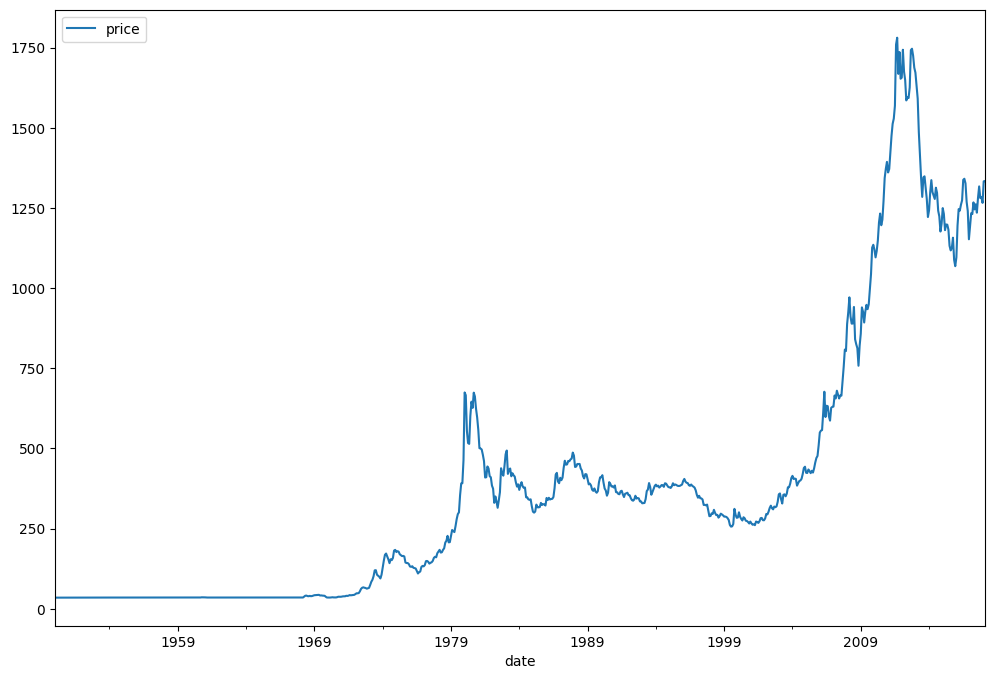

In [5]:
data.plot(figsize=(12,8))

In [6]:
start_date ='2003-01-01'
end_date ='2018-01-01'
mask = (data.index>= start_date)& (data.index< end_date)
data = data.loc[mask]

<AxesSubplot: xlabel='date'>

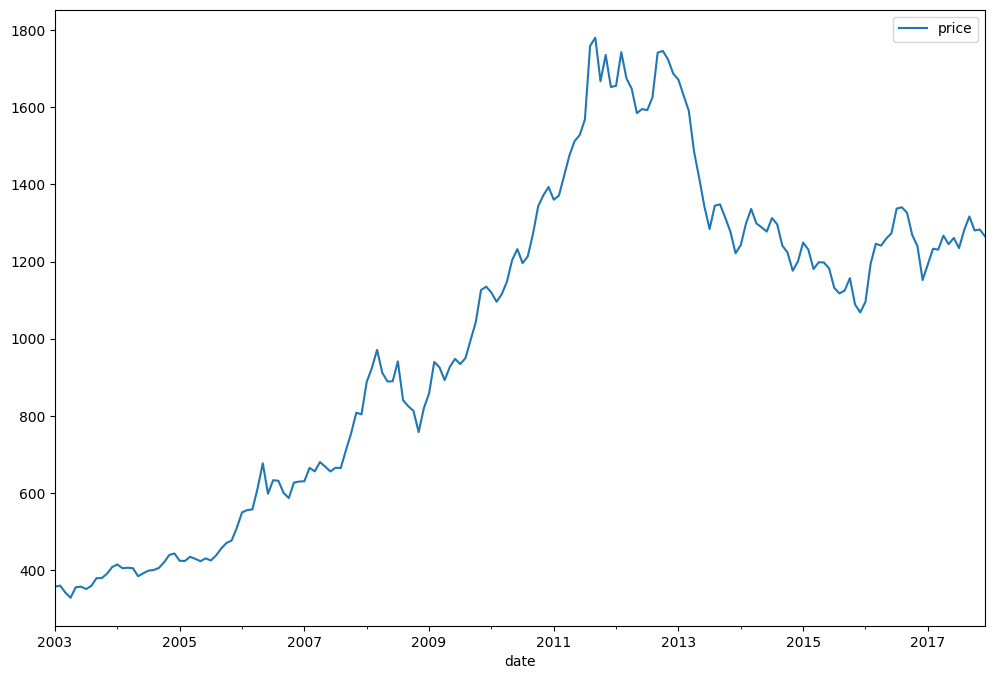

In [7]:
data.index.freq ='MS'
data.plot(figsize=(12,8))

# ARIMA MODEL 

In [8]:
datayearly = data.rolling(window =12).mean()

<AxesSubplot: title={'center': 'Yearly Avg Gold Prices'}, xlabel='date'>

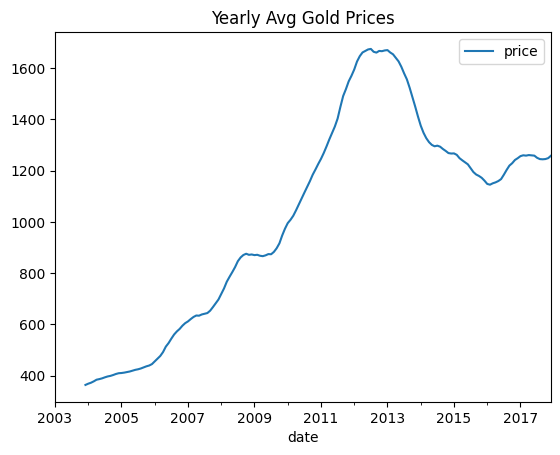

In [9]:
datayearly.plot(title ="Yearly Avg Gold Prices")

In [10]:
datayearly = data.rolling(window=12).mean()

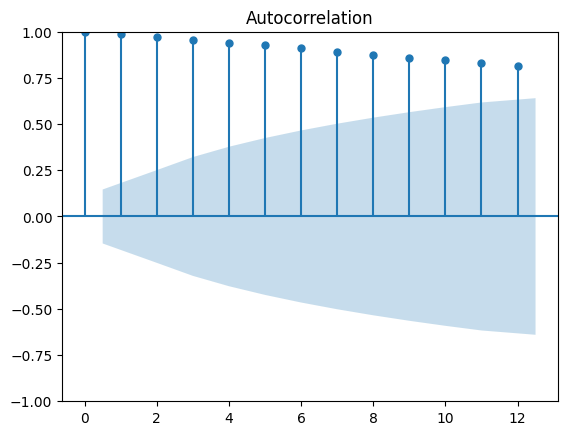

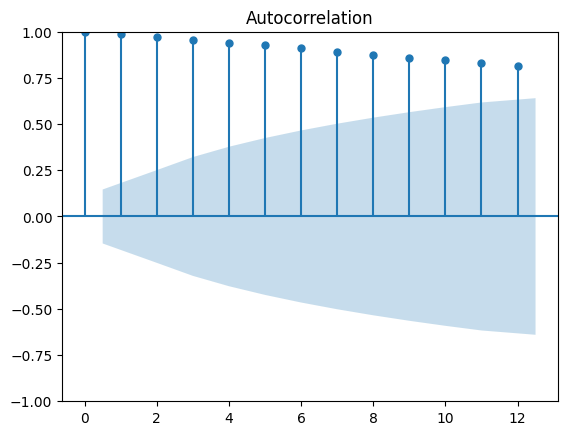

In [11]:

from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['price'],lags=12)


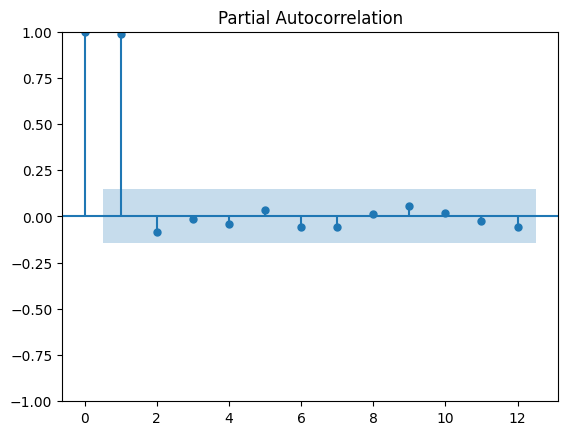

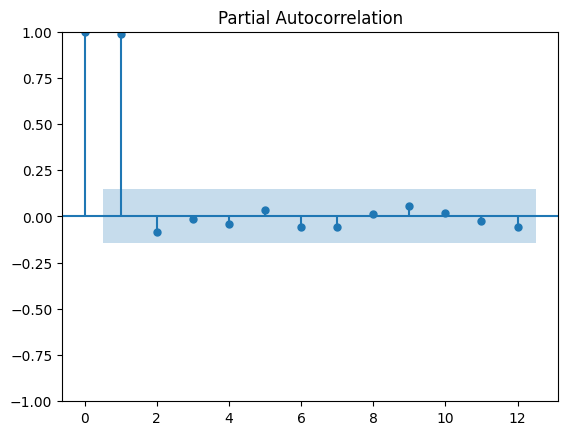

In [12]:
plot_pacf(data['price'],lags=12 )

In [13]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result =adfuller(series,autolag='AIC')
    labels =['ADF Test Statistic','p value','#lags used','# observations']
    out = pd.Series(result[0:4],index = labels)
    print(out.to_string())
    if result [1]<= 0.05:
        print("Rejecr the null hypothesis")
        print("Data has no unit root and stationary ")
    else:
        print("FAll to reject the null hypothesis")
        print("Data has no unit root and non-staionary")

In [14]:
adf_test(data['price'])

ADF Test Statistic     -1.464763
p value                 0.550865
#lags used              1.000000
# observations        178.000000
FAll to reject the null hypothesis
Data has no unit root and non-staionary


In [17]:
from pmdarima import auto_arima
arima_fit = auto_arima(data['price'],start_P=0,start_Q=0,max_Q=10,seasonal = False,trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1850.257, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1850.825, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1847.678, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1847.242, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1851.411, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1847.325, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1849.028, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1848.378, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1847.120, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1847.590, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1849.020, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1847.481, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1848.370, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.258 seconds


In [18]:
import statsmodels.api as sm 
model = sm.tsa.arima.ARIMA(data['price'],order =(1,0,1))

In [19]:
modelresults = model.fit()

In [20]:
fcast = modelresults.predict(start = len(data),end = len(data)+24,typ=('levels'))
fcast = fcast.rename("ARIMA 1,0,1 Forecast")

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='date'>

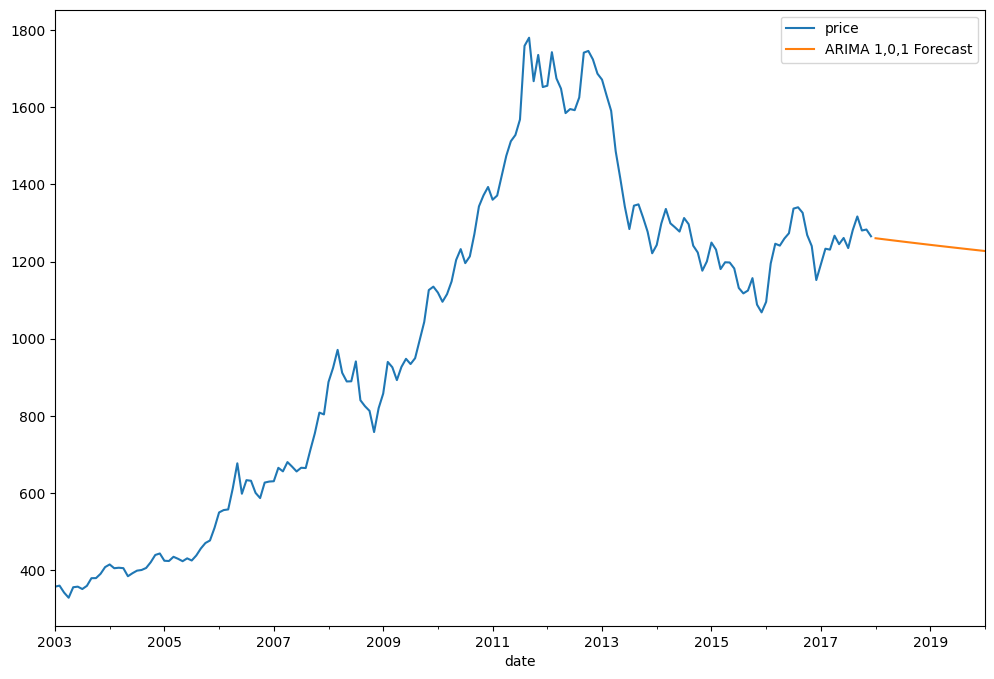

In [21]:
data['price'].plot(figsize =(12,8),legend = True)
fcast.plot(legend=True)